In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.2)
img_height = 224
img_width = 224 
batch_size = 128
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 10656 images belonging to 37 classes.
Found 2664 images belonging to 37 classes.


In [ ]:
from tensorflow.keras.applications import vgg19
# Init the VGG model
vgg_conv = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8bc73bfcd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8c0584f650> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc8a3f8d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8bca2bcb10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc8a41b10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc8aaaf50> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8bc84dcc50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc84e4e50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc84eced0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc84dcf90> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8bc84f7f90> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(37, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 37)                37925     
Total params: 45,753,445
Trainable params: 25,729,061
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
train_it.samples

10656

In [ ]:
import keras
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['acc'])

In [ ]:
nb_epochs = 100
batch_size = 128
model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
83/83 [==============================] - 3141s 38s/step - loss: 3.7924 - acc: 0.0306 - val_loss: 3.4841 - val_acc: 0.1078
Epoch 2/100
83/83 [==============================] - 63s 754ms/step - loss: 3.5309 - acc: 0.0622 - val_loss: 3.3986 - val_acc: 0.1648
Epoch 3/100
83/83 [==============================] - 62s 742ms/step - loss: 3.4569 - acc: 0.1016 - val_loss: 3.3342 - val_acc: 0.2629
Epoch 4/100
83/83 [==============================] - 62s 746ms/step - loss: 3.4120 - acc: 0.1188 - val_loss: 3.2749 - val_acc: 0.3020
Epoch 5/100
83/83 [==============================] - 62s 749ms/step - loss: 3.3671 - acc: 0.1389 - val_loss: 3.2156 - val_acc: 0.2754
Epoch 6/100
83/83 [==============================] - 62s 746ms/step - loss: 3.3177 - acc: 0.1580 - val_loss: 3.1634 - val_acc: 0.2637
Epoch 7/100
83/83 [==============================] - 62s 744ms/step - loss: 3.2682 - acc: 0.1711 - val_loss: 3.1048 - val_acc: 0.3492
Epoch 8/100
83/83 [==============================] - 62s 745ms

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_1_VGG19")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_1_VGG19/assets


In [ ]:
val_it.classes

array([ 0,  0,  0, ..., 36, 36, 36], dtype=int32)

In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 76.46%
[INFO] Loss:  1.2414575815200806


In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '38', '4', '5', '6', '7', '8', '9']


In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.71875


Normalized confusion matrix


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


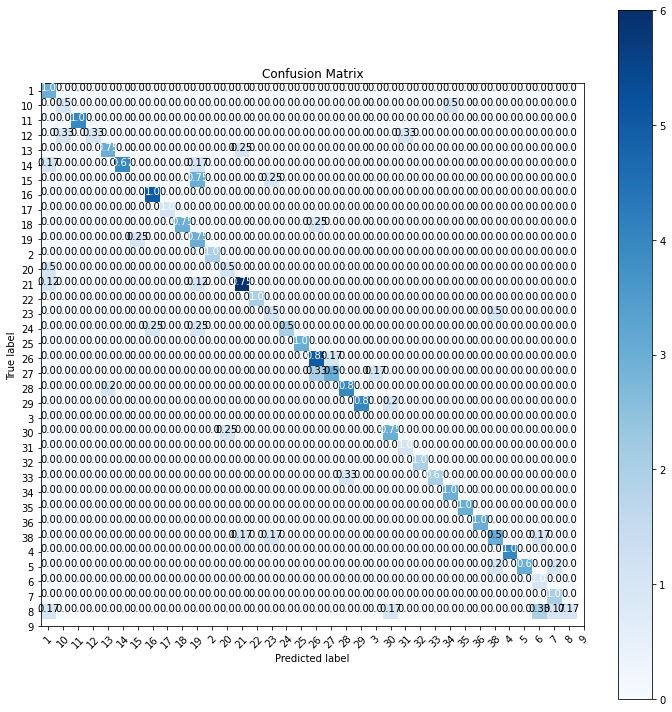

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         4
           3       1.00      0.33      0.50         3
           4       0.75      0.75      0.75         4
           5       1.00      0.67      0.80         6
           6       0.00      0.00      0.00         4
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         1
           9       1.00      0.75      0.86         4
          10       0.33      0.75      0.46         4
          11       1.00      1.00      1.00         2
          12       0.50      0.50      0.50         2
          13       0.75      0.75      0.75         8
          14       1.00      1.00      1.00         2
          15       0.33      0.50      0.40         2
          16       1.00      0.50      0.67         4
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
batch_size = 2664
# prepare an iterators for each dataset
# train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset1',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 2664 images belonging to 37 classes.


In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.7646396396396397


Normalized confusion matrix


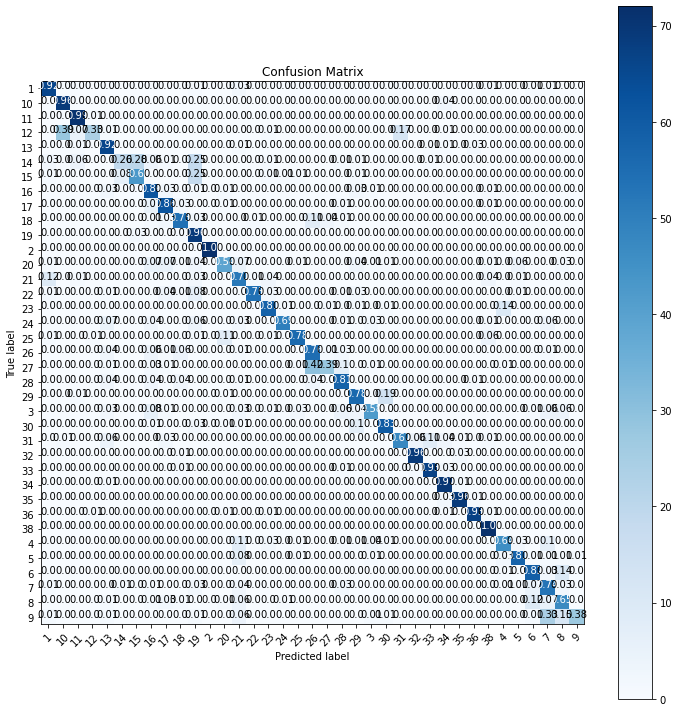

In [ ]:
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
print('Classification Report')

print(classification_report(y_true, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        72
           1       0.70      0.96      0.81        72
           2       0.86      0.99      0.92        72
           3       0.89      0.33      0.48        72
           4       0.73      0.92      0.81        72
           5       0.73      0.26      0.39        72
           6       0.66      0.60      0.63        72
           7       0.63      0.86      0.73        72
           8       0.76      0.86      0.81        72
           9       0.78      0.75      0.77        72
          10       0.53      0.96      0.68        72
          11       1.00      1.00      1.00        72
          12       0.74      0.54      0.62        72
          13       0.57      0.72      0.63        72
          14       0.96      0.75      0.84        72
          15       0.82      0.81      0.81        72
          16       0.94      0.69      0.80        72
     